# Convolution Nets for MNIST

Deep Learning models can take quite a bit of time to run, particularly if GPU isn't used. 

In the interest of time, you could sample a subset of observations (e.g. $1000$) that are a particular number of your choice (e.g. $6$) and $1000$ observations that aren't that particular number (i.e. $\neq 6$). 

We will build a model using that and see how it performs on the test dataset

In [1]:
#Import the required libraries
import numpy as np
np.random.seed(1338)

from keras.datasets import mnist

Using TensorFlow backend.


In [70]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization

In [3]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [4]:
from keras.utils import np_utils
from keras.optimizers import SGD

## Loading Data

In [22]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
% ls data/

intro_to_ann.csv  kaggle_ottogroup/ mnist.pkl.gz      word_embeddings/


In [7]:
X_test_orig = X_test

## Data Preparation

In [8]:
from keras import backend as K

#### Very Important: 
When dealing with images & convolutions, it is paramount to handle `image_data_format` properly

In [9]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

In [10]:
K.image_data_format()

'channels_last'

#### Preprocess and Normalise Data

In [23]:
X_train[0].shape

(28, 28)

In [24]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [36]:
Y_train, Y_test = y_train, y_test

In [37]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))


In [38]:
# Converting the classes to its binary categorical form
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

# A simple CNN

In [46]:
# -- Initializing the values for the convolution neural network

nb_epoch = 10 # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

#### Step 1: Model Definition

In [77]:
nb_filters_small = 4
nb_pool_small = 4
model = Sequential()

model.add(Conv2D(nb_filters_small, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool_small, nb_pool_small)))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

#### Step 2: Compile

In [78]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 4)         40        
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 4)         16        
_________________________________________________________________
activation_29 (Activation)   (None, 26, 26, 4)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 4)           0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 144)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1450      
_________________________________________________________________
activation_30 (Activation)   (None, 10)                0         
Total para

#### Step 3: Fit

In [80]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s - loss: 0.7998 - acc: 0.7484 - val_loss: 0.4245 - val_acc: 0.8638
Epoch 2/10
60000/60000 [==============================] - 13s - loss: 0.3953 - acc: 0.8765 - val_loss: 0.3280 - val_acc: 0.8973
Epoch 3/10
60000/60000 [==============================] - 14s - loss: 0.3283 - acc: 0.8966 - val_loss: 0.2833 - val_acc: 0.9108
Epoch 4/10
60000/60000 [==============================] - 15s - loss: 0.2840 - acc: 0.9106 - val_loss: 0.2434 - val_acc: 0.9224
Epoch 5/10
60000/60000 [==============================] - 15s - loss: 0.2437 - acc: 0.9238 - val_loss: 0.2070 - val_acc: 0.9358
Epoch 6/10
60000/60000 [==============================] - 16s - loss: 0.2108 - acc: 0.9353 - val_loss: 0.1835 - val_acc: 0.9424
Epoch 7/10
60000/60000 [==============================] - 16s - loss: 0.1872 - acc: 0.9420 - val_loss: 0.1628 - val_acc: 0.9510
Epoch 8/10
60000/60000 [==============================

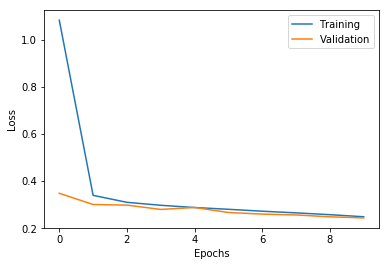

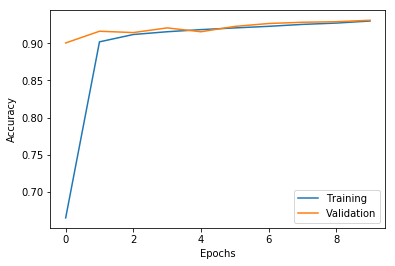

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

### Step 4: Evaluate

In [63]:
print('Available Metrics in Model: {}'.format(model.metrics_names))

Available Metrics in Model: ['loss', 'acc']


In [64]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.0827156598154
Test Accuracy: 0.9686


### Let's plot our model Predictions!

In [65]:
import matplotlib.pyplot as plt

%matplotlib inline

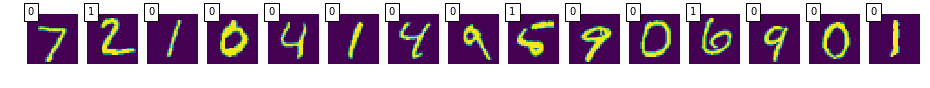

In [66]:
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Adding more Dense Layers

In [ ]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

In [ ]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

# Adding Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                        padding='valid',
                        input_shape=shape_ord))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

In [ ]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

# Adding more Convolution Layers

In [75]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [76]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 186s - loss: 0.4554 - acc: 0.8660 - val_loss: 0.1233 - val_acc: 0.9693
Epoch 2/10
60000/60000 [==============================] - 194s - loss: 0.1996 - acc: 0.9462 - val_loss: 0.0840 - val_acc: 0.9779
Epoch 3/10
60000/60000 [==============================] - 181s - loss: 0.1531 - acc: 0.9585 - val_loss: 0.0670 - val_acc: 0.9803
Epoch 4/10
60000/60000 [==============================] - 186s - loss: 0.1289 - acc: 0.9640 - val_loss: 0.0583 - val_acc: 0.9824
Epoch 5/10
60000/60000 [==============================] - 204s - loss: 0.1163 - acc: 0.9673 - val_loss: 0.0544 - val_acc: 0.9841
Epoch 6/10
60000/60000 [==============================] - 236s - loss: 0.1033 - acc: 0.9703 - val_loss: 0.0466 - val_acc: 0.9855
Epoch 7/10
60000/60000 [==============================] - 238s - loss: 0.0963 - acc: 0.9726 - val_loss: 0.0444 - val_acc: 0.9865
Epoch 8/10
60000/60000 [=======================

In [ ]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

# Exercise

The above code has been written as a function. 

Change some of the **hyperparameters** and see what happens. 

In [ ]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model():
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation('relu'))
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)

In [ ]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

# Batch Normalisation

Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

## How to BatchNorm in Keras

```python
from keras.layers.normalization import BatchNormalization

BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, 
                   beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
                   moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None,
                   beta_constraint=None, gamma_constraint=None)
```

#### Arguments

<ul>
<li><strong>axis</strong>: Integer, the axis that should be normalized
    (typically the features axis).
    For instance, after a <code>Conv2D</code> layer with
    <code>data_format="channels_first"</code>,
    set <code>axis=1</code> in <code>BatchNormalization</code>.</li>
<li><strong>momentum</strong>: Momentum for the moving average.</li>
<li><strong>epsilon</strong>: Small float added to variance to avoid dividing by zero.</li>
<li><strong>center</strong>: If True, add offset of <code>beta</code> to normalized tensor.
    If False, <code>beta</code> is ignored.</li>
<li><strong>scale</strong>: If True, multiply by <code>gamma</code>.
    If False, <code>gamma</code> is not used.
    When the next layer is linear (also e.g. <code>nn.relu</code>),
    this can be disabled since the scaling
    will be done by the next layer.</li>
<li><strong>beta_initializer</strong>: Initializer for the beta weight.</li>
<li><strong>gamma_initializer</strong>: Initializer for the gamma weight.</li>
<li><strong>moving_mean_initializer</strong>: Initializer for the moving mean.</li>
<li><strong>moving_variance_initializer</strong>: Initializer for the moving variance.</li>
<li><strong>beta_regularizer</strong>: Optional regularizer for the beta weight.</li>
<li><strong>gamma_regularizer</strong>: Optional regularizer for the gamma weight.</li>
<li><strong>beta_constraint</strong>: Optional constraint for the beta weight.</li>
<li><strong>gamma_constraint</strong>: Optional constraint for the gamma weight.</li>
</ul>

### Excercise

In [ ]:
# Try to add a new BatchNormalization layer to the Model 
# (after the Dropout layer) - before or after the ReLU Activation